In [1]:
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy import stats
from tqdm import tqdm
import seaborn as sns
from os import path
import pandas as pd
import numpy as np
import sys

In [2]:
df = pd.read_csv('/home/roboticslab/Robotology/Repos/allostractor/data/input_test/dataframe.csv')
df = df.drop(columns=['Unnamed: 0'])
df

Q  Var  Episode     Drive  \
0     0.0    0        0   Arousal   
1     0.0    0        0  Security   
2     0.0    0        1   Arousal   
3     0.0    0        1  Security   
4     0.0    0        2   Arousal   
...   ...  ...      ...       ...   
2415  1.0  100        7  Security   
2416  1.0  100        8   Arousal   
2417  1.0  100        8  Security   
2418  1.0  100        9   Arousal   
2419  1.0  100        9  Security   

                                                  Input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0.000133333333333, 0.000266666666666, 0.00039...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0.000133333333333, 0.000266666666666, 0.00039...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0.000133333333333, 0.000266666666666, 0.00039...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0.000133333333333, 0.000266666666666, 0.00039...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  \
0     [0.08422348254027834, 0.16477823495339894, 0.2...   
1     [0.08425282440189262, 0.16486570617211838, 0.2...   
2     [1.4906671113846215, 1.4214808605617493, 1.355...   
3     [39.728950766367056, 39.62452215951652, 39.523...   
4     [1.4906671113846215, 1.4214808605617493, 1.355...   
...                                                 ...   
2415  [8.315394873130128, 4.38705393366105, 11.92597...   
2416  [44.47456426089253, 44.95645516996734, 39.6823...   
2417  [61.70399159554175, 63.213260922044086, 59.334...   
2418  [-0.0, 7.72251033747894, 15.638085907941372, 9...   
2419  [35.97295829577929, 27.335425147457215, 26.568...   

                                                 Normal  \
0     [0.03509333 0.06865802 0.10076089 ... 0.650546...   
1     [0.00211414 0.00413694 0.00607241 ... 0.999624...   
2     [0.62111512 0.59228734 0.56488887 ... 0.650546...   
3     [0.99690978 0.99428938 0.9917633  ... 0.999624...   
4     [0.62111512 0.59228734 0.56488887 ... 0.650546...   
...                                                 ...   
2415  [0.0856597  0.04519253 0.12285352 ... 0.479193...   
2416  [0.43860783 0.44336024 0.39134671 ... 0.014506...   
2417  [0.62507369 0.64036288 0.60107259 ... 0.492002...   
2418  [-0.          0.07991071  0.16181921 ...  0.27...   
2419  [0.34618855 0.26306458 0.25568481 ... 0.606059...   

                                            Bined_input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           Bined_output  
0     [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, ...  
3     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...  
4     [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, ...  
...                                                 ...  
2415  [0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, ...  
2416  [4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, ...  
2417  [6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...  
2418  [0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, ...  
2419  [3, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[2420 rows x 9 columns]

In [3]:
aro_aV_list = literal_eval(df['Input'][0])
sec_aV_list = literal_eval(df['Input'][1])

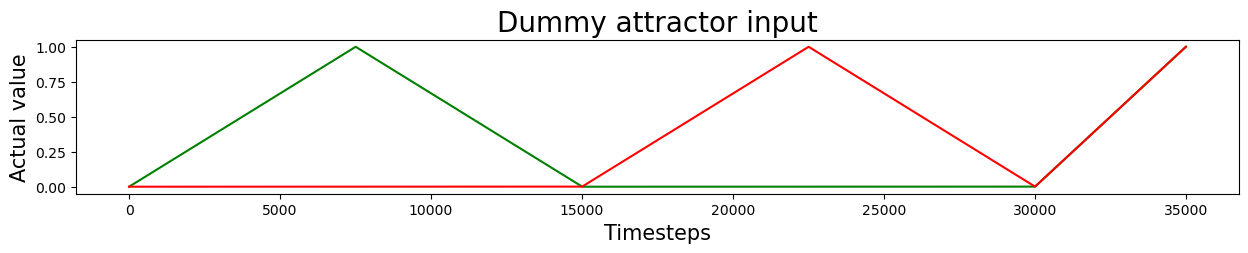

In [4]:
plt.figure(figsize=(15, 2))
plt.plot(sec_aV_list,'g')
plt.plot(aro_aV_list,'r')
plt.title('Dummy attractor input', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

In [5]:
rslt_df = df[(df['Q'] == .5) &
             (df['Var'] == 50)]

rslt_df

Q  Var  Episode     Drive  \
1200  0.5   50        0   Arousal   
1201  0.5   50        0  Security   
1202  0.5   50        1   Arousal   
1203  0.5   50        1  Security   
1204  0.5   50        2   Arousal   
1205  0.5   50        2  Security   
1206  0.5   50        3   Arousal   
1207  0.5   50        3  Security   
1208  0.5   50        4   Arousal   
1209  0.5   50        4  Security   
1210  0.5   50        5   Arousal   
1211  0.5   50        5  Security   
1212  0.5   50        6   Arousal   
1213  0.5   50        6  Security   
1214  0.5   50        7   Arousal   
1215  0.5   50        7  Security   
1216  0.5   50        8   Arousal   
1217  0.5   50        8  Security   
1218  0.5   50        9   Arousal   
1219  0.5   50        9  Security   

                                                  Input  \
1200  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1201  [0.000133333333333, 0.000266666666666, 0.00039...   
1202  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1203  [0.000133333333333, 0.000266666666666, 0.00039...   
1204  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1205  [0.000133333333333, 0.000266666666666, 0.00039...   
1206  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1207  [0.000133333333333, 0.000266666666666, 0.00039...   
1208  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1209  [0.000133333333333, 0.000266666666666, 0.00039...   
1210  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1211  [0.000133333333333, 0.000266666666666, 0.00039...   
1212  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1213  [0.000133333333333, 0.000266666666666, 0.00039...   
1214  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1215  [0.000133333333333, 0.000266666666666, 0.00039...   
1216  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1217  [0.000133333333333, 0.000266666666666, 0.00039...   
1218  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1219  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  \
1200  [-0.0, -0.0, 0.6244600486902929, -0.0, -0.0, -...   
1201  [41.54641997220916, 39.754564832823064, 40.915...   
1202  [5.7230867583684955, 3.7402832937487345, 2.323...   
1203  [34.53338893767278, 34.3673036232252, 34.15580...   
1204  [1.4189003082362526, 4.593521138355576, 4.9887...   
1205  [36.86306978832636, 38.358149586473765, 36.106...   
1206  [-0.0, 4.50305620164075, 0.20829305756542738, ...   
1207  [41.543915231151054, 38.44550837521879, 42.326...   
1208  [38.902009348211315, 42.710653060905955, 39.13...   
1209  [25.10706439576786, 26.394759259615434, 26.398...   
1210  [-0.0, 1.2642447269389416, 1.3303655344942449,...   
1211  [42.94814264822041, 41.63607743694894, 38.9739...   
1212  [45.34993362584759, 45.5595631404573, 43.53145...   
1213  [-0.0, -0.0, 1.0067262296934196, 0.27944539637...   
1214  [50.531780697035614, 49.75948254853145, 47.057...   
1215  [1.2824590032522052, 1.480995464067858, 0.2562...   
1216  [38.78875902317395, 39.788521331592605, 37.543...   
1217  [11.118359297139095, 12.125411071048651, 12.81...   
1218  [31.542725691120683, 30.638495021390607, 30.89...   
1219  [33.5809107919183, 30.938545466570055, 33.8048...   

                                                 Normal  \
1200  [-0.         -0.          0.00902521 ...  0.09...   
1201  [0.60943371 0.58314944 0.60018146 ... 0.465547...   
1202  [0.07877868 0.05148526 0.03198723 ... 0.108251...   
1203  [0.50776408 0.50532203 0.5022122  ... 0.583005...   
1204  [0.0189939  0.06149048 0.06678057 ... 0.059587...   
1205  [0.52085193 0.54197646 0.51016736 ... 0.517418...   
1206  [-0.          0.0675978   0.0031268  ...  0.57...   
1207  [0.56734551 0.52503204 0.57802955 ... 0.402420...   
1208  [ 0.52266385  0.57383449  0.52575143 ...  0.02...   
1209  [0.34315004 0.36074957 0.36080176 ... 0.590508...   
1210  [-0.          0.0186852   0.01966245 ...  0.64...   
1211  [ 0.61920517  0.60028846  0.56190762

In [6]:
output = rslt_df['Output']

index = output.index
index

Int64Index([1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210,
            1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219],
           dtype='int64')

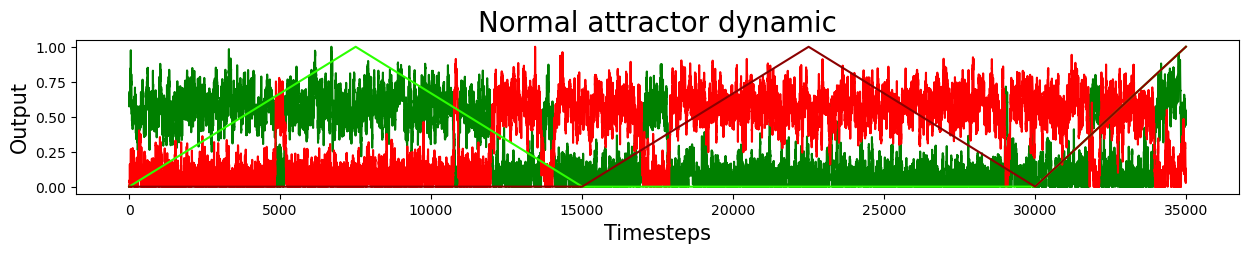

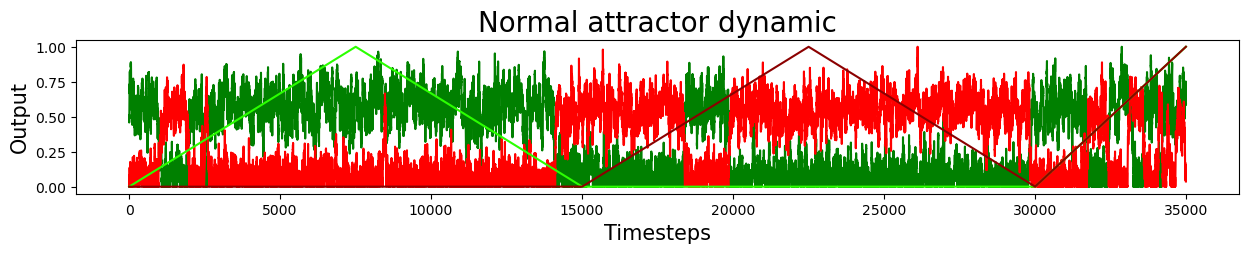

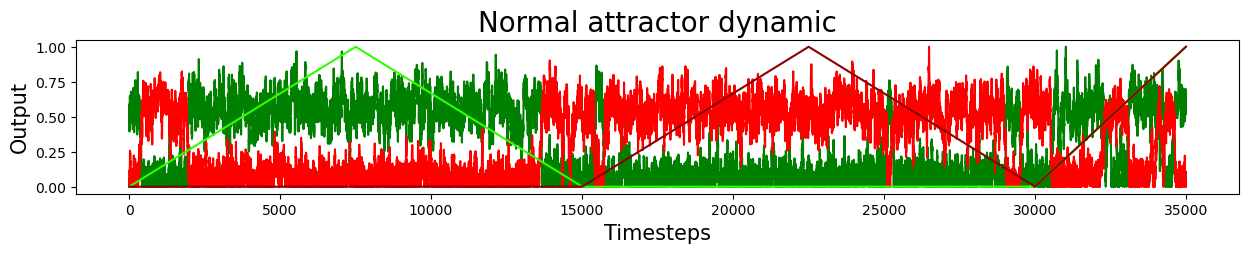

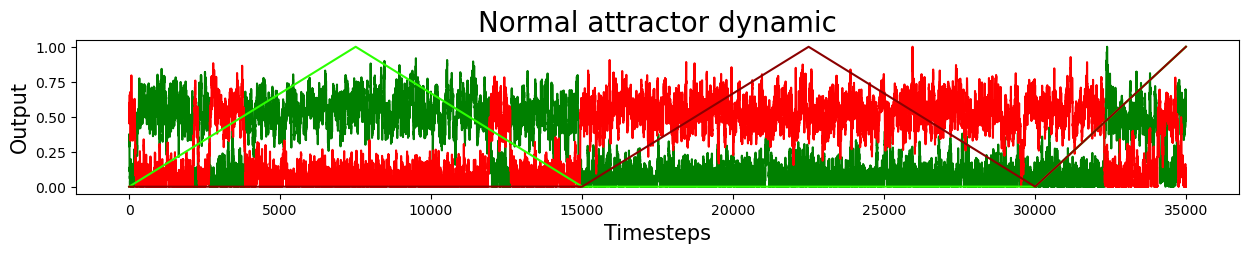

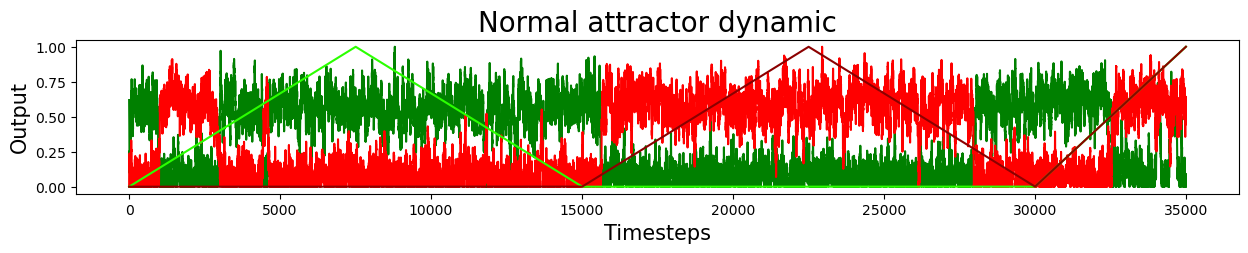

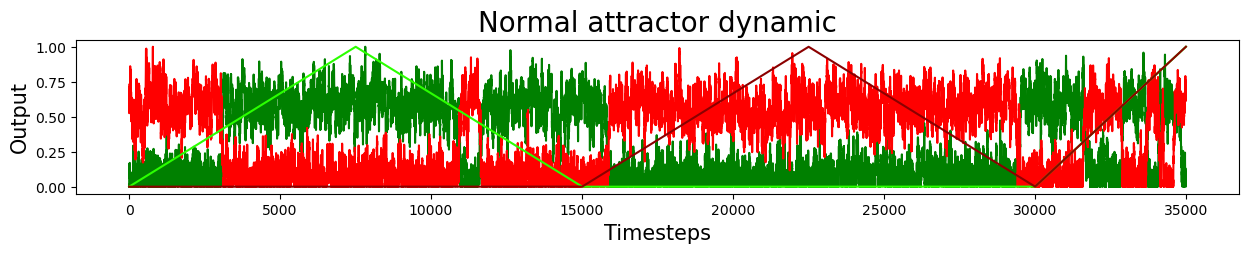

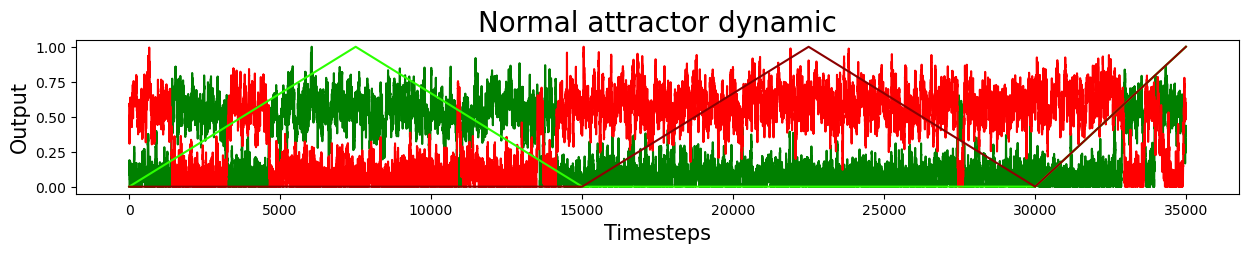

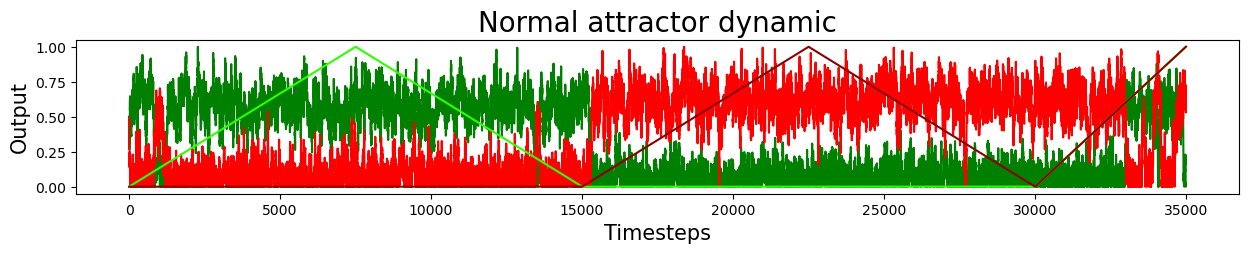

In [7]:
for i in range(int(len(rslt_df)/2)):
    sec_out = np.array(literal_eval(output[i*2+index[1]]))
    aro_out = np.array(literal_eval(output[i*2+index[0]]))
    plt.figure(figsize=(15, 2))
    plt.plot(sec_out/max(sec_out),'g')
    plt.plot(aro_out/max(aro_out),'r')
    plt.plot(np.array(sec_aV_list),'#2bff00')
    plt.plot(np.array(aro_aV_list),'darkred')
    plt.title('Normal attractor dynamic', fontsize=20)
    plt.ylabel('Output', fontsize=15)
    plt.xlabel('Timesteps', fontsize=15)
    plt.show()

In [8]:
bin_output = df['Bined_output']
bin_input = df['Bined_input']

index = bin_output.index
index

RangeIndex(start=0, stop=2420, step=1)

In [9]:
plt.figure(figsize=(15, 2))
plt.plot(np.array(literal_eval(bin_output[0])),'darkred')
plt.title('Normal attractor dynamic', fontsize=20)
plt.ylabel('Output', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

In [10]:
def mutual_info(distr):
    pS = np.sum(distr, axis=1)
    pR = np.sum(distr, axis=0)
    pSR = np.copy(distr)
    np.seterr(divide='ignore', invalid='ignore')
    I = np.sum(pSR * np.ma.log2(pSR / (pR[np.newaxis, :] * pS[:, np.newaxis])).filled(0))
    return I

In [11]:
# Max Mutual Information
input_bins = 10
output_bins = 10

max_distr = np.zeros((input_bins,output_bins))
max_distr[0,0] = 1
max_distr[1,1] = 1
max_distr[2,2] = 1
max_distr[3,3] = 1
max_distr[4,4] = 1
max_distr[5,5] = 1
max_distr[6,6] = 1
max_distr[7,7] = 1
max_distr[8,8] = 1
max_distr[9,9] = 1

max_distr /= max_distr.sum()

print("Max mutual information = " + str(mutual_info(max_distr)))

Max mutual information = 3.321928094887362


In [12]:
# Distribution
count = 0
MI_column = []
distr_list1 = []
distr_list2 = []
distr_list3 = []

input_bins = 10
output_bins = 10

distr = np.zeros((input_bins,output_bins))
for i in range(int(len(bin_output))):
    out = np.array(literal_eval(bin_output[index[i]]))
    inp = np.array(literal_eval(bin_input[index[i]]))

    for j in range(len(inp)):
        distr[inp[j], out[j]] +=1
    
    distr /= distr.sum()
    
    distr /= mutual_info(max_distr)
    
    mut_inf = mutual_info(distr)
    
    MI_column.append(mut_inf)
    
    print(i)
    print(mut_inf)
    
    distr = np.zeros((input_bins,output_bins))
print(len(inp))

0
0.9405163944278674
1
0.5943440895978205
2
0.9765332419339972
3
0.5542584546791677
4
0.9765332419339972
5
0.5542584546791677
6
0.9765332419339972
7
0.5542584546791677
8
0.9765332419339972
9
0.5542584546791677
10
0.9765332419339972
11
0.5542584546791677
12
0.9765332419339972
13
0.5542584546791677
14
0.9765332419339972
15
0.5542584546791677
16
0.9765332419339972
17
0.5542584546791677
18
0.9765332419339972
19
0.5542584546791677
20
0.6483075047261554
21
0.6204419179003329
22
0.7574674579969218
23
0.6548409566922625
24
0.7173993641220552
25
0.6156110662579055
26
0.7582761776306818
27
0.6535863778424673
28
0.690616887826782
29
0.5816553318700715
30
0.6435504384592858
31
0.6208918348493563
32
0.7672062958644502
33
0.6582460014902818
34
0.7504197040685985
35
0.6331418861638297
36
0.705861651372235
37
0.606688483574433
38
0.7281016265481632
39
0.6289293061657619
40
0.6610301574205827
41
0.7891595517909631
42
0.7885891938692903
43
0.6548436951349703
44
0.7943616648008262
45
0.6935329182203053
4

364
0.6163085509196928
365
0.6119692619358095
366
0.611498804453567
367
0.5994106317861762
368
0.5840131401266281
369
0.6004456711224786
370
0.603551446719134
371
0.5758712384780833
372
0.5896821093462326
373
0.591932985924712
374
0.6021505622764168
375
0.5974181282602526
376
0.59709100694007
377
0.5781258246592921
378
0.5729548030585725
379
0.5972217355382969
380
0.5637829319889344
381
0.5727257069151637
382
0.5769638042883946
383
0.5546837507079505
384
0.5786677751722814
385
0.5758582060792471
386
0.5688036871223431
387
0.5753145846965517
388
0.5650531787418328
389
0.5747181087660727
390
0.5687545369754716
391
0.5800632047797192
392
0.5621598130233386
393
0.5616506103293436
394
0.5714433065142556
395
0.5777429934226069
396
0.5743146414968875
397
0.5792690633778615
398
0.573251056280552
399
0.5643229605534386
400
0.547732742123537
401
0.5583297441410326
402
0.5665868454241385
403
0.5467966637311028
404
0.5398655444422809
405
0.5475517883417079
406
0.5496514261532376
407
0.553038520674

723
0.5455129926013355
724
0.6327717333548263
725
0.5686708912036766
726
0.5944305247442478
727
0.5534002124902032
728
0.5792119118220614
729
0.5334529334487542
730
0.6451582424434089
731
0.5638234964637752
732
0.6216579799658725
733
0.5672838781272688
734
0.5405537628851507
735
0.5368300919730702
736
0.5728269317811009
737
0.528693187038848
738
0.601087522439701
739
0.5517984207382468
740
0.7149039263627844
741
0.5831018447953438
742
0.6665820711559796
743
0.6546802211015457
744
0.6976161132947055
745
0.638276681614482
746
0.6356525226241427
747
0.7435435867579815
748
0.6687052144567197
749
0.6685485962546441
750
0.5763156668421908
751
0.6424315323930535
752
0.6893134612682853
753
0.7118843624022562
754
0.7245203750766225
755
0.6236054792924987
756
0.6431385760939305
757
0.6204445105268191
758
0.6784640713850463
759
0.568040114453649
760
0.6160953649951676
761
0.6933453365418502
762
0.6928740103571663
763
0.6409608475442491
764
0.6401796537356818
765
0.620059966741765
766
0.6988159972

1078
0.5526957075551513
1079
0.5559331801515227
1080
0.5246340588039798
1081
0.5377530465200007
1082
0.5455450701585453
1083
0.5479128007800483
1084
0.530554363412209
1085
0.536651667823864
1086
0.5524897904788822
1087
0.5520572456684659
1088
0.5423097240520776
1089
0.5355485799738421
1090
0.5489868971202071
1091
0.5449313505876985
1092
0.5418147302195657
1093
0.5408939878341384
1094
0.5440709039302535
1095
0.5421911100990708
1096
0.5474765389420214
1097
0.5438597421756086
1098
0.54754349693849
1099
0.5377575334442797
1100
0.5215247065308468
1101
1.1053395938250583
1102
0.5213902276543247
1103
1.1004557870658864
1104
0.5213902276543247
1105
1.1004557870658864
1106
0.5213902276543247
1107
1.1004557870658864
1108
0.5213902276543247
1109
1.1004557870658864
1110
0.5213902276543247
1111
1.1004557870658864
1112
0.5213902276543247
1113
1.1004557870658864
1114
0.5213902276543247
1115
1.1004557870658864
1116
0.5213902276543247
1117
1.1004557870658864
1118
0.5213902276543247
1119
1.1004557870658

1423
0.7158410666271174
1424
0.6399385613218891
1425
0.639883046623043
1426
0.6639821121421535
1427
0.6700867852366345
1428
0.670148456926401
1429
0.6371476231595552
1430
0.5854554951812676
1431
0.6280866988391887
1432
0.6489295836294656
1433
0.6673534793896423
1434
0.6165821939827836
1435
0.5973474704541305
1436
0.6121994225751257
1437
0.6729521916345663
1438
0.6303467043150801
1439
0.6157218136702522
1440
0.596591669834233
1441
0.5970109992911437
1442
0.5723790548781789
1443
0.6481525329817214
1444
0.6182353987268784
1445
0.5580993400277943
1446
0.6241394579558216
1447
0.6377338984857629
1448
0.6211048249854046
1449
0.6300704973814674
1450
0.6085754000893079
1451
0.6226595826920012
1452
0.63372677574776
1453
0.5934951516917313
1454
0.5986916247592665
1455
0.5891720707321078
1456
0.5833983732005616
1457
0.6444680895644649
1458
0.594134634506155
1459
0.5900820095801881
1460
0.5750261660662216
1461
0.5976199315207198
1462
0.5892509438483571
1463
0.5712074922204681
1464
0.585254536903563

1767
1.098259885002947
1768
0.5213902276543247
1769
1.098259885002947
1770
0.5213902276543247
1771
1.098259885002947
1772
0.5213902276543247
1773
1.098259885002947
1774
0.5213902276543247
1775
1.098259885002947
1776
0.5213902276543247
1777
1.098259885002947
1778
0.5213902276543247
1779
1.098259885002947
1780
0.5231190513882826
1781
0.5253561522692095
1782
0.5243996224361223
1783
0.5249606229752429
1784
0.5228885641140917
1785
0.5242202256853947
1786
0.5232189478667947
1787
0.523414531498109
1788
0.522413662434812
1789
0.5250204428320371
1790
0.5226306889344715
1791
0.5253587235877679
1792
0.5236801368348701
1793
0.5252850150454047
1794
0.5244825090071487
1795
0.5242342074521632
1796
0.523399075200612
1797
0.5243044637126848
1798
0.523498526251586
1799
0.5237425680709191
1800
0.5238379122631752
1801
0.5253724876125425
1802
0.5251397800572407
1803
0.5251649243123232
1804
0.5244220224101431
1805
0.5247344405256124
1806
0.5259113755128717
1807
0.5250103757074566
1808
0.5234244716234772
180

2112
0.5974447860800409
2113
0.5935778938800602
2114
0.6075714660293061
2115
0.5589163005462046
2116
0.6246861584298095
2117
0.6081582014893504
2118
0.5545582987227526
2119
0.5946666589275907
2120
0.586739977281838
2121
0.5631421231391467
2122
0.5471538194394837
2123
0.5481741463729374
2124
0.5679280446386479
2125
0.5606092068662936
2126
0.5957647689164138
2127
0.6056734010731619
2128
0.5555864150288765
2129
0.5861527635500361
2130
0.5629031830867576
2131
0.54753220074845
2132
0.5467955334902221
2133
0.5618855402705589
2134
0.572408813726221
2135
0.5669554186735973
2136
0.5925827402206737
2137
0.5695359594139956
2138
0.5632157236209677
2139
0.6028775967415895
2140
0.5624791660213566
2141
0.5424786373248351
2142
0.5473648031541942
2143
0.5442896028618925
2144
0.5461169385767078
2145
0.5565392567492217
2146
0.5458492624231425
2147
0.5536967102785965
2148
0.5520504801836289
2149
0.5550102897271976
2150
0.5718537406930386
2151
0.5563739490317594
2152
0.547922745614388
2153
0.55764085495819

In [13]:
df['Mutual_Info'] = MI_column
df

Q  Var  Episode     Drive  \
0     0.0    0        0   Arousal   
1     0.0    0        0  Security   
2     0.0    0        1   Arousal   
3     0.0    0        1  Security   
4     0.0    0        2   Arousal   
...   ...  ...      ...       ...   
2415  1.0  100        7  Security   
2416  1.0  100        8   Arousal   
2417  1.0  100        8  Security   
2418  1.0  100        9   Arousal   
2419  1.0  100        9  Security   

                                                  Input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0.000133333333333, 0.000266666666666, 0.00039...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0.000133333333333, 0.000266666666666, 0.00039...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0.000133333333333, 0.000266666666666, 0.00039...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0.000133333333333, 0.000266666666666, 0.00039...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  \
0     [0.08422348254027834, 0.16477823495339894, 0.2...   
1     [0.08425282440189262, 0.16486570617211838, 0.2...   
2     [1.4906671113846215, 1.4214808605617493, 1.355...   
3     [39.728950766367056, 39.62452215951652, 39.523...   
4     [1.4906671113846215, 1.4214808605617493, 1.355...   
...                                                 ...   
2415  [8.315394873130128, 4.38705393366105, 11.92597...   
2416  [44.47456426089253, 44.95645516996734, 39.6823...   
2417  [61.70399159554175, 63.213260922044086, 59.334...   
2418  [-0.0, 7.72251033747894, 15.638085907941372, 9...   
2419  [35.97295829577929, 27.335425147457215, 26.568...   

                                                 Normal  \
0     [0.03509333 0.06865802 0.10076089 ... 0.650546...   
1     [0.00211414 0.00413694 0.00607241 ... 0.999624...   
2     [0.62111512 0.59228734 0.56488887 ... 0.650546...   
3     [0.99690978 0.99428938 0.9917633  ... 0.999624...   
4     [0.62111512 0.59228734 0.56488887 ... 0.650546...   
...                                                 ...   
2415  [0.0856597  0.04519253 0.12285352 ... 0.479193...   
2416  [0.43860783 0.44336024 0.39134671 ... 0.014506...   
2417  [0.62507369 0.64036288 0.60107259 ... 0.492002...   
2418  [-0.          0.07991071  0.16181921 ...  0.27...   
2419  [0.34618855 0.26306458 0.25568481 ... 0.606059...   

                                            Bined_input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           Bined_output  Mutual_Info  
0     [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...     0.940516  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     0.594344  
2     [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, ...     0.976533  
3     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...     0.554258  
4     [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, ...     0.976533  
...                                                 ...          ...  
2415  [0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, ...     0.530955  
2416  [4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, ...     0.536064  
2417  [6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...     0.542978  
2418  [0, 0, 1, 0

In [14]:
sec_df = df.loc[ df['Drive'] == 'Security']
aro_df = df.loc[ df['Drive'] == 'Arousal']

sec_df = sec_df.reset_index()
aro_df = aro_df.reset_index()

sec_df = sec_df.drop(columns=['index'])
aro_df = aro_df.drop(columns=['index'])

In [15]:
sec_df

Q  Var  Episode     Drive  \
0     0.0    0        0  Security   
1     0.0    0        1  Security   
2     0.0    0        2  Security   
3     0.0    0        3  Security   
4     0.0    0        4  Security   
...   ...  ...      ...       ...   
1205  1.0  100        5  Security   
1206  1.0  100        6  Security   
1207  1.0  100        7  Security   
1208  1.0  100        8  Security   
1209  1.0  100        9  Security   

                                                  Input  \
0     [0.000133333333333, 0.000266666666666, 0.00039...   
1     [0.000133333333333, 0.000266666666666, 0.00039...   
2     [0.000133333333333, 0.000266666666666, 0.00039...   
3     [0.000133333333333, 0.000266666666666, 0.00039...   
4     [0.000133333333333, 0.000266666666666, 0.00039...   
...                                                 ...   
1205  [0.000133333333333, 0.000266666666666, 0.00039...   
1206  [0.000133333333333, 0.000266666666666, 0.00039...   
1207  [0.000133333333333, 0.000266666666666, 0.00039...   
1208  [0.000133333333333, 0.000266666666666, 0.00039...   
1209  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  \
0     [0.08425282440189262, 0.16486570617211838, 0.2...   
1     [39.728950766367056, 39.62452215951652, 39.523...   
2     [39.728950766367056, 39.62452215951652, 39.523...   
3     [39.728950766367056, 39.62452215951652, 39.523...   
4     [39.728950766367056, 39.62452215951652, 39.523...   
...                                                 ...   
1205  [12.320027289311415, 10.660117682267476, 14.14...   
1206  [29.203834485947056, 26.64956477618465, 31.358...   
1207  [8.315394873130128, 4.38705393366105, 11.92597...   
1208  [61.70399159554175, 63.213260922044086, 59.334...   
1209  [35.97295829577929, 27.335425147457215, 26.568...   

                                                 Normal  \
0     [0.00211414 0.00413694 0.00607241 ... 0.999624...   
1     [0.99690978 0.99428938 0.9917633  ... 0.999624...   
2     [0.99690978 0.99428938 0.9917633  ... 0.999624...   
3     [0.99690978 0.99428938 0.9917633  ... 0.999624...   
4     [0.99690978 0.99428938 0.9917633  ... 0.999624...   
...                                                 ...   
1205  [0.11970794 0.10357938 0.13747374 ... 0.224888...   
1206  [0.32178765 0.29364297 0.34553113 ... 0.147033...   
1207  [0.0856597  0.04519253 0.12285352 ... 0.479193...   
1208  [0.62507369 0.64036288 0.60107259 ... 0.492002...   
1209  [0.34618855 0.26306458 0.25568481 ... 0.606059...   

                                            Bined_input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
1205  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1206  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1207  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1208  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1209  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           Bined_output  Mutual_Info  
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     0.594344  
1     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...     0.554258  
2     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...     0.554258  
3     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...     0.554258  
4     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...     0.554258  
...                                                 ...          ...  
1205  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...     0.536405  
1206  [3, 2, 3, 3, 3, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, ...     0.538339  
1207  [0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, ...     0.530955  
1208  [6, 6, 6, 6

In [16]:
sec_MI_cond = []
normal_MI = 0
init = 1
end = 11

for i in range(int(len(sec_df)/10)):
    normal_MI = sec_df['Mutual_Info'][init:end].sum() / 10
    sec_MI_cond.append(normal_MI)
    print(normal_MI)
    init += 10
    end += 10
    
sec_MI_cond /= max(sec_MI_cond)

0.5608768010012842
0.6442750796697332
0.7022656859417497
0.7231021417183376
0.7210607579701984
0.6537771018621921
0.6328319329070855
0.590975430932245
0.569823469993757
0.5572727792474872
0.5671359843124281
0.5238911838836737
0.5559141252600455
0.5930103973355157
0.6739571999386498
0.6762917020854633
0.645794880718854
0.6226924567693541
0.5917096408067405
0.5701953226853824
0.5535658995111817
0.5438773531897966
1.0286084241283713
0.5320129355235225
0.549252056331129
0.6047044728566776
0.6566755871429913
0.6429364216897235
0.6214928965898942
0.5965748607772882
0.5686612014454308
0.5515511844720017
0.5446811238266936
1.0418027132471335
0.5268421030713818
0.536624455888488
0.5532567948880522
0.656480042133878
0.6319888064080426
0.6067499528411882
0.5862915915935746
0.5658299436916162
0.551553132190309
0.5435516657380028
0.52171027104134
0.5241443680136763
0.5310458597723301
0.552876470258756
0.6163753659383068
0.6238672034383531
0.6151898198124555
0.5779077620936984
0.5679932194382787
0.5

In [17]:
aro_MI_cond = []
normal_MI = 0
init = 0
end = 10

for i in range(int(len(aro_df)/10)):
    normal_MI = aro_df['Mutual_Info'][init:end].sum() / 10
    aro_MI_cond.append(normal_MI)
    print(normal_MI)
    init += 10
    end += 10

aro_MI_cond /= max(aro_MI_cond)

0.9729315571833841
0.7167207108615329
0.7339533167468896
0.7489132420996156
0.700028816501483
0.6624440207713924
0.6256956852869748
0.5966314119724909
0.5680524095888976
0.5583877140460922
0.547416260046392
0.9989563780367892
0.5319140047502272
0.6593280207670116
0.7111863756531388
0.7154090556167122
0.671261471651005
0.6223856931699399
0.5947508355294613
0.5703194731604292
0.5550711863588058
0.5470702889480118
0.521403675541977
0.5303886816118116
0.564416277124245
0.6637301949344733
0.7030969500910459
0.6526700457265889
0.6116674311324407
0.5965439164331334
0.5748619413807046
0.5531247307965697
0.546954742083589
0.5214323926585103
0.5264526733928234
0.5263650158798133
0.5981434967144087
0.6695211998560407
0.6487667319636164
0.6120307727475263
0.5820032351782694
0.5644409825608449
0.5481730749148948
0.5435677879303407
1.059042871590502
0.5259687071273549
0.5327208442858499
0.5833553715558739
0.6906657579676737
0.6601566706104774
0.6106273018755578
0.5888048780336896
0.5684752703469852


In [18]:
aro_MI_cond

array([0.91868949, 0.6767627 , 0.69303457, 0.70716046, 0.6610014 ,
       0.625512  , 0.59081242, 0.56336852, 0.53638283, 0.52725695,
       0.51689717, 0.9432634 , 0.50225918, 0.62256972, 0.67153691,
       0.67552417, 0.63383786, 0.58768697, 0.56159278, 0.5385235 ,
       0.52412532, 0.51657048, 0.49233481, 0.5008189 , 0.53294941,
       0.62672646, 0.66389848, 0.61628293, 0.57756626, 0.5632859 ,
       0.54281272, 0.52228738, 0.51646138, 0.49236193, 0.49710232,
       0.49701955, 0.5647963 , 0.63219461, 0.61259723, 0.57790935,
       0.54955588, 0.53297274, 0.51761179, 0.51326325, 1.        ,
       0.49664534, 0.50302104, 0.55083263, 0.65216034, 0.62335217,
       0.57658412, 0.55597832, 0.53678211, 0.52154914, 0.51229518,
       0.49233481, 0.49417108, 0.49547993, 0.54501312, 0.60992474,
       0.59845792, 0.57210657, 0.55316465, 0.52793544, 0.51699639,
       0.51234837, 0.49235091, 0.49404117, 0.49545395, 0.5202742 ,
       0.59347693, 0.5946203 , 0.57136282, 0.5436459 , 0.52960

In [19]:
aro_MI_cond = np.array(aro_MI_cond).reshape(-1, 11)
aro_MI_cond

array([[0.91868949, 0.6767627 , 0.69303457, 0.70716046, 0.6610014 ,
        0.625512  , 0.59081242, 0.56336852, 0.53638283, 0.52725695,
        0.51689717],
       [0.9432634 , 0.50225918, 0.62256972, 0.67153691, 0.67552417,
        0.63383786, 0.58768697, 0.56159278, 0.5385235 , 0.52412532,
        0.51657048],
       [0.49233481, 0.5008189 , 0.53294941, 0.62672646, 0.66389848,
        0.61628293, 0.57756626, 0.5632859 , 0.54281272, 0.52228738,
        0.51646138],
       [0.49236193, 0.49710232, 0.49701955, 0.5647963 , 0.63219461,
        0.61259723, 0.57790935, 0.54955588, 0.53297274, 0.51761179,
        0.51326325],
       [1.        , 0.49664534, 0.50302104, 0.55083263, 0.65216034,
        0.62335217, 0.57658412, 0.55597832, 0.53678211, 0.52154914,
        0.51229518],
       [0.49233481, 0.49417108, 0.49547993, 0.54501312, 0.60992474,
        0.59845792, 0.57210657, 0.55316465, 0.52793544, 0.51699639,
        0.51234837],
       [0.49235091, 0.49404117, 0.49545395, 0.5202742 , 0.

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(aro_MI_cond, square=True, ax=ax, cmap="Greens", annot=True, fmt=".3")

plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

plt.yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], rotation=0,fontsize=12);
plt.xticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],fontsize=12);
plt.xlabel("Variability",fontsize=20)
plt.ylabel("SST/PV ratio",fontsize=20)
plt.title('Security Input-Output MI', fontsize=30)
plt.tight_layout()
plt.show()

In [21]:
sec_MI_cond = np.array(sec_MI_cond).reshape(-1, 11)
sec_MI_cond

array([[0.5378987 , 0.61788031, 0.67349514, 0.69347797, 0.69152022,
        0.62699305, 0.60690596, 0.56676425, 0.54647884, 0.53444233,
        0.54390146],
       [0.50242832, 0.53313934, 0.56871584, 0.6463464 , 0.64858527,
        0.61933784, 0.59718188, 0.56746838, 0.54683546, 0.53088732,
        0.52159569],
       [0.98646822, 0.51021734, 0.5267502 , 0.57993083, 0.62977279,
        0.61659649, 0.59603147, 0.57213428, 0.54536419, 0.52895514,
        0.52236653],
       [0.99912196, 0.50525834, 0.51463993, 0.53059087, 0.62958525,
        0.60609738, 0.58189252, 0.5622723 , 0.54264892, 0.52895701,
        0.52128335],
       [0.50033675, 0.50267113, 0.50928988, 0.53022613, 0.59112359,
        0.5983085 , 0.58998662, 0.55423194, 0.54472357, 0.52437692,
        0.57418613],
       [1.        , 0.50395763, 0.50680516, 0.52442204, 0.58673091,
        0.62153783, 0.57890822, 0.5553581 , 0.53739866, 0.52304734,
        0.51721123],
       [0.99836415, 0.50343115, 0.50268117, 0.52259623, 0.

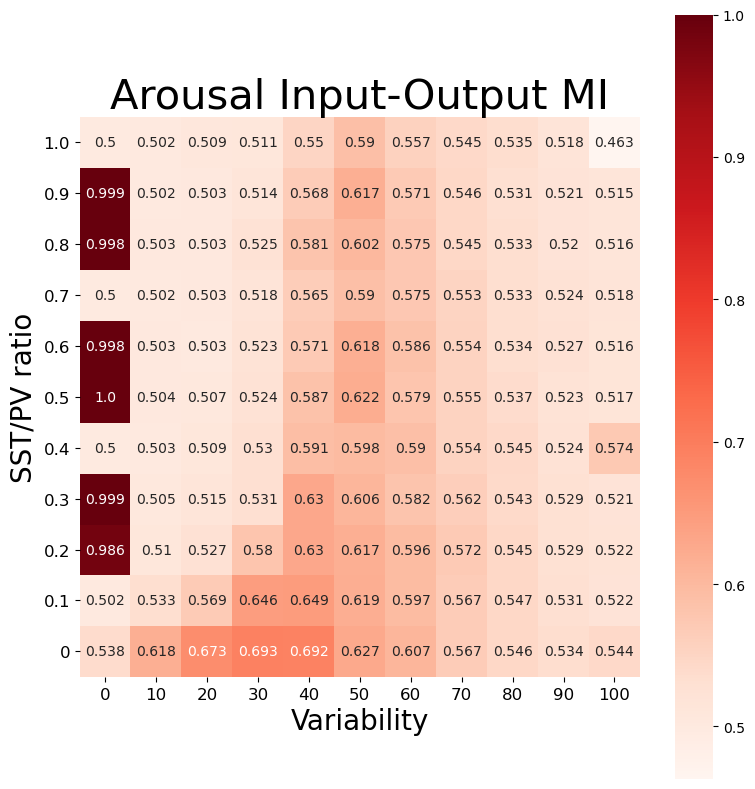

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sec_MI_cond, square=True, ax=ax, cmap="Reds", annot=True, fmt=".3")

plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

plt.yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], rotation=0,fontsize=12);
plt.xticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],fontsize=12);
plt.xlabel("Variability",fontsize=20)
plt.ylabel("SST/PV ratio",fontsize=20)
plt.title('Arousal Input-Output MI', fontsize=30)
plt.tight_layout()
plt.show()

In [23]:
secaroMI = (sec_MI_cond + aro_MI_cond)/2

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(secaroMI, square=True, ax=ax, cmap="Purples", annot=True, fmt=".3")

plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

plt.yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], rotation=0,fontsize=12)
plt.xticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],fontsize=12)
plt.xlabel("Variability",fontsize=20)
plt.ylabel("SST/PV ratio",fontsize=20)
plt.title('Sec+Aro Input-Output MI', fontsize=30)
plt.tight_layout()
plt.show()

In [25]:
secaroMI

array([[0.7282941 , 0.6473215 , 0.68326485, 0.70031921, 0.67626081,
        0.62625252, 0.59885919, 0.56506638, 0.54143084, 0.53084964,
        0.53039931],
       [0.72284586, 0.51769926, 0.59564278, 0.65894166, 0.66205472,
        0.62658785, 0.59243443, 0.56453058, 0.54267948, 0.52750632,
        0.51908309],
       [0.73940151, 0.50551812, 0.52984981, 0.60332865, 0.64683563,
        0.61643971, 0.58679886, 0.56771009, 0.54408846, 0.52562126,
        0.51941396],
       [0.74574194, 0.50118033, 0.50582974, 0.54769359, 0.63088993,
        0.60934731, 0.57990093, 0.55591409, 0.53781083, 0.5232844 ,
        0.5172733 ],
       [0.75016838, 0.49965824, 0.50615546, 0.54052938, 0.62164197,
        0.61083034, 0.58328537, 0.55510513, 0.54075284, 0.52296303,
        0.54324065],
       [0.74616741, 0.49906436, 0.50114255, 0.53471758, 0.59832783,
        0.60999788, 0.57550739, 0.55426138, 0.53266705, 0.52002187,
        0.5147798 ],
       [0.74535753, 0.49873616, 0.49906756, 0.52143521, 0.

In [32]:
fig, ax = plt.subplots(figsize=(9,8))
plt.contourf(secaroMI, cmap='RdGy_r')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], rotation=0,fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],fontsize=12)
plt.xlabel("Variability",fontsize=20)
plt.ylabel("SST/PV ratio",fontsize=20)
plt.title('Model Input-Output MI', fontsize=30, pad=15)
plt.tight_layout()
plt.colorbar()
plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/Q_Var/SecAroMI.pdf', format='pdf', bbox_inches='tight')

# MultiAttractor Test

In [2]:
# Creating dummy inputs

ramp_lenght = 5000

ramp_increase = [x*(1/ramp_lenght) for x in range(0, ramp_lenght)]
ramp_decrease = [1 - (x*(1/ramp_lenght)) for x in range(0, ramp_lenght)]
ramp = ramp_increase + ramp_decrease

energy_aV_list = ramp + [0]*25000
osmo_aV_list = [0]*10000 + ramp + [0]*15000
temp_aV_list = [0]*20000 + ramp + [0]*5000

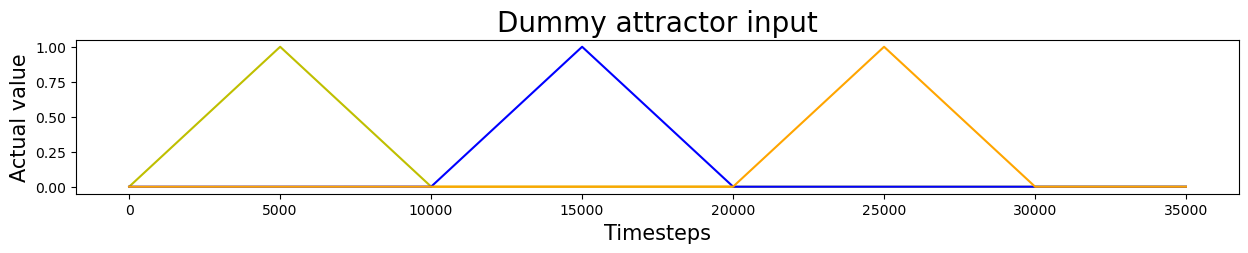

In [3]:
plt.figure(figsize=(15, 2))
plt.plot(energy_aV_list,'y')
plt.plot(osmo_aV_list,'blue')
plt.plot(temp_aV_list,'orange')
plt.title('Dummy attractor input', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

In [4]:
sys.path.append(path.abspath('/home/roboticslab/Robotology/Repos/allostractor/git'))
from multiattractor import MultiAttractor

In [13]:
out_energy_list = []
out_osmo_list = []
out_temp_list = []


class agent():
    def __init__(self):
        self.multiattractor = MultiAttractor()
        self.energy_aV = energy_aV_list
        self.osmo_aV = osmo_aV_list
        self.temp_aV = temp_aV_list
        self.multiattractor.var = 50
        self.multiattractor.q = 0.5
        
    def attractor_dynamics(self,index):
        global out_energy_list, out_osmo_list, out_temp_list

        out_energy, out_osmo, out_temp = self.multiattractor.advance(self.energy_aV[index]*60, self.osmo_aV[index]*60, self.temp_aV[index]*60)
        out_energy_list.append(out_energy)
        out_osmo_list.append(out_osmo)
        out_temp_list.append(out_temp)
        
    def run(self):
        global out_energy_list, out_osmo_list, out_temp_list
        for n in range(len(energy_aV_list)):
            self.attractor_dynamics(n)

        print(len(out_energy_list))

In [14]:
allo = agent()

if __name__ == '__main__':
    try:
        allo.run()
    except KeyboardInterrupt:
        print('Simulation interrupted')

TypeError: advance() takes 3 positional arguments but 4 were given